In [2]:
import numpy as np 


p291 2.

假设 x1, . . . , xn 是一组来自未知连续分布函数 F 的简单随机样本。
我们想要检验以下假设：
- H0：分布 F 的中位数为零。
- H1：分布 F 的中位数大于零。
考虑使用著名的非参数符号检验统计量 $T_n =\Sigma_{i=1}^n I(X_i > 0)$ ，其中 I(·) 是指示函数。
显然当 Tn 很大时拒绝 H0。这是一个与分布无关的检验（也就是说其零分布不依赖于 F）。
请描述使用 Monte Carlo 模拟方法来求取该检验的 p 值的具体步骤

### Solution:

p 值是在原假设 H0 为真的条件下，观察到检验统计量 Tn 至少与实际观测值同样极端的概率。对于这个右尾检验，我们有：
$$
p-value = P (T_{n,sim} ≥ T_{n,obs} |H_0 is true)
$$
其中 $T_{n,obs}$ 是从实际数据中计算得到的检验统计量，$T_{n,sim}$ 是在 H0 下模拟
得到的检验统计量。
Monte Carlo 模拟的具体步骤如下：

1. 计算观测到的检验统计量 (Tobs )：
根据给定的样本数据 x1 , . . . , xn ，计算实际观测到的检验统计量的值：
$$
T_{obs} =\Sigma_{i=1}^n I(X_i > 0)
$$
2. 理解原假设 H0 下的分布：
在原假设 H0 下，对于一个连续分布 F ，每个观测值 Xi 大于零的概
率 $P (X_i > 0) = 0.5，P (X_i < 0) = 0.5$ 。因此，在 H0 下，$\Sigma_{i=1}^n I(X_i > 0)$ 
服从 Bernoulli(0.5)。那么，检验统计量 $T_n =\Sigma_{i=1}^n I(Xi > 0)$ 作为 n个独立同分布的 Bernoulli(0.5) 随机变量之和，其在 H0 下的分布是
二项分布 B(n, 0.5)。
3. 进行 Monte Carlo 模拟：
(a) 选择一个足够大的模拟次数 M 。
(b) 对于每一次模拟 j（从 1 到 M ）：在原假设 H0 为真的条件下生
成一组模拟数据。由于我们知道在 H0 下 Tn ∼ B(n, 0.5)，我们
可以直接从该二项分布中抽取一个随机数作为模拟的检验统计
量 $T^(j)_{sim}$ 。
(c) 这样，我们就得到了 M 个在 H0 为真条件下的模拟检验统计量：$T^{(j)}_{sim}$，其中 j = 1, 2, ..., M。
4. 计算 p 值：
(j)
统计在 M 次模拟中，有多少个模拟的检验统计量 Tsim 大于或等于我
们实际观测到的检验统计量 Tobs 。令这个计数为 count_extreme。
$$
count_extreme =\Sigma_{j=1}^M I(T^{(j)}_{sim} ≥ T_{obs})
$$
5. 最终计算 p 值：
$$
p-value = \frac{count\_extreme}{M}
$$

p291 4.

In [3]:
def F_reverse(x,lam):
    """
    reverse the function F(x)=1-exp(-lam*x) 
    """
    return -1/lam*np.log(1-x)


In [4]:
u=np.random.uniform(0,1,100)
lam=2
v = F_reverse(u, lam)

In [5]:
from scipy import stats
# Check if the generated values follow the exponential distribution
k2, p_value = stats.kstest(v, 'expon', args=(0, 1/lam))
print(f"Kolmogorov-Smirnov test statistic: {k2}, p-value: {p_value}")

Kolmogorov-Smirnov test statistic: 0.05671913668582673, p-value: 0.8862266190734995


p309 1.

假设总体均值为 $\mu$ ,我们感兴趣的是估计 $\mu^2$ .现考虑直接使用 $X_bar^2$ 作为 $\mu^2$ 的估计.请问这种方法的偏差如何？如果存在偏差,如何进行偏差修正?

In [6]:

def estimate_mu_squared(X):
    """
    使用两种方法估计 mu^2
    """
    X_bar = np.mean(X)
    S2 = np.var(X, ddof=1)  # 样本方差

    biased = X_bar ** 2
    unbiased = X_bar ** 2 - S2 / len(X)

    return biased, unbiased

# 模拟一次实验
np.random.seed(0)
mu = 3
sigma = 2
n = 30
X = np.random.normal(loc=mu, scale=sigma, size=n)

biased_est, unbiased_est = estimate_mu_squared(X)

print(f"Biased estimate (X_bar^2): {biased_est:.4f}")
print(f"Unbiased estimate: {unbiased_est:.4f}")
print(f"True mu^2: {mu**2:.4f}")


Biased estimate (X_bar^2): 15.0988
Unbiased estimate: 14.9373
True mu^2: 9.0000


p309 2.

假设我们有一组来自于形状参数为 $\alpha$ 、尺度参数为 1 的 gamma
分布的简单随机样本 Y1, . . . , Yn。

(1) 请描述如何使用参数 bootstrap 方法获得关于 $sqrt(\alpha)$ 的下 95% 单侧置
信区间；

(2) 我们如何构造一个置信水平为 0.05 的 Monte Carlo 检验 
$H_0:sqrt(alpha)<=10 \quad vs \quad H_1 : sqrt(alpha)>10$ 的检验统计量？

(3) 上面两问的答案之间有什么关系？

In [8]:
# 模拟样本数据
def generate_sample(alpha, n, seed=0):
    np.random.seed(seed)
    return np.random.gamma(shape=alpha, scale=1, size=n)

# Method-of-Moments 估计 alpha
def estimate_alpha(Y):
    return (np.mean(Y) ** 2) / np.var(Y, ddof=1)

# (1) Bootstrap 置信下界
def bootstrap_CI(Y, B=1000, conf_level=0.95):
    n = len(Y)
    alpha_hat = estimate_alpha(Y)
    sqrt_alpha_bootstrap = []

    for _ in range(B):
        # 参数 bootstrap：从 Gamma(α_hat, 1) 生成样本
        Y_star = np.random.gamma(shape=alpha_hat, scale=1, size=n)
        alpha_star = estimate_alpha(Y_star)
        sqrt_alpha_bootstrap.append(np.sqrt(alpha_star))

    # 下单侧置信区间临界值
    lower_bound = np.percentile(sqrt_alpha_bootstrap, (1 - conf_level) * 100)
    return lower_bound

# (2) Monte Carlo 检验
def monte_carlo_test(Y, B=1000, alpha_null=100):
    n = len(Y)
    sqrt_alpha_obs = np.sqrt(estimate_alpha(Y))

    count = 0
    for _ in range(B):
        Y_star = np.random.gamma(shape=alpha_null, scale=1, size=n)
        sqrt_alpha_star = np.sqrt(estimate_alpha(Y_star))
        if sqrt_alpha_star >= sqrt_alpha_obs:
            count += 1

    p_value = count / B
    return sqrt_alpha_obs, p_value


In [9]:
n = 30
true_alpha = 64  # 对应 sqrt(alpha) = 8
Y = generate_sample(alpha=true_alpha, n=n)

# (1) Bootstrap 下置信界限
lower_bound = bootstrap_CI(Y)
print(f"Bootstrap 下95%置信区间为: [{lower_bound:.3f}, ∞)")

# (2) Monte Carlo 检验 H0: sqrt(alpha) <= 10
sqrt_alpha_obs, p_value = monte_carlo_test(Y)
print(f"观测统计量 sqrt(alpha_hat): {sqrt_alpha_obs:.3f}")
print(f"Monte Carlo 检验 p值: {p_value:.4f}")


Bootstrap 下95%置信区间为: [5.470, ∞)
观测统计量 sqrt(alpha_hat): 6.542
Monte Carlo 检验 p值: 1.0000


1. 生成n = 20, 30, 50个来自于Exp(1)的随机变量, 比较样本均值X̄的

精确分布、CLT近似分布和Bootstrap方法构造的分布之间的差异, 

并讨论Bootstrap方法相比于CLT近似方法的优缺点.

In [ ]:

# 模拟样本数据
def generate_sample(alpha, n, seed=0):
    np.random.seed(seed)
    return np.random.gamma(shape=alpha, scale=1, size=n)

# Method-of-Moments 估计 alpha
def estimate_alpha(Y):
    return (np.mean(Y) ** 2) / np.var(Y, ddof=1)

# (1) Bootstrap 置信下界
def bootstrap_CI(Y, B=1000, conf_level=0.95):
    n = len(Y)
    alpha_hat = estimate_alpha(Y)
    sqrt_alpha_bootstrap = []

    for _ in range(B):
        # 参数 bootstrap：从 Gamma(α_hat, 1) 生成样本
        Y_star = np.random.gamma(shape=alpha_hat, scale=1, size=n)
        alpha_star = estimate_alpha(Y_star)
        sqrt_alpha_bootstrap.append(np.sqrt(alpha_star))

    # 下单侧置信区间临界值
    lower_bound = np.percentile(sqrt_alpha_bootstrap, (1 - conf_level) * 100)
    return lower_bound

# (2) Monte Carlo 检验
def monte_carlo_test(Y, B=1000, alpha_null=100):
    n = len(Y)
    sqrt_alpha_obs = np.sqrt(estimate_alpha(Y))

    count = 0
    for _ in range(B):
        Y_star = np.random.gamma(shape=alpha_null, scale=1, size=n)
        sqrt_alpha_star = np.sqrt(estimate_alpha(Y_star))
        if sqrt_alpha_star >= sqrt_alpha_obs:
            count += 1

    p_value = count / B
    return sqrt_alpha_obs, p_value


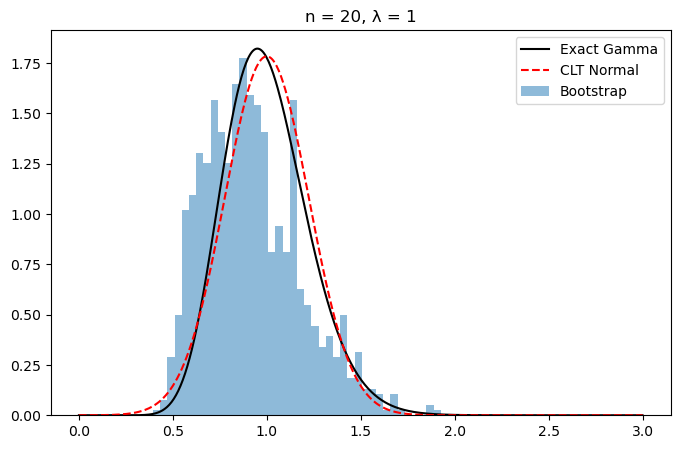

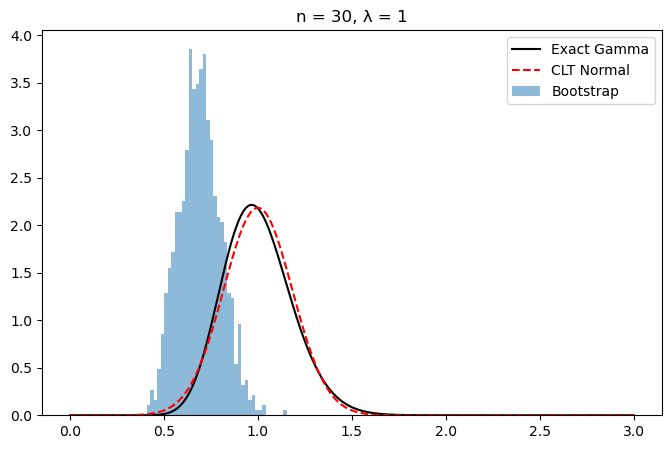

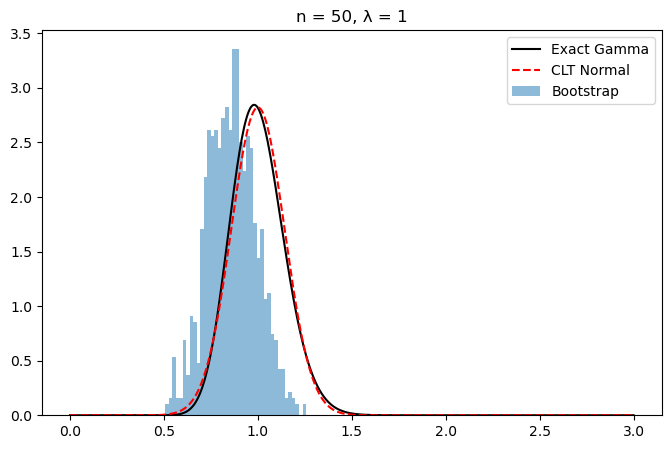

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, norm

def compare_distributions(n, lam=1, B=1000):
    X = np.random.exponential(scale=1/lam, size=n)
    X_bar = np.mean(X)

    # 精确分布
    x_vals = np.linspace(0, 3, 500)
    gamma_pdf = gamma.pdf(x_vals, a=n, scale=1/(n*lam))

    # CLT 近似
    clt_pdf = norm.pdf(x_vals, loc=1/lam, scale=1/(lam*np.sqrt(n)))

    # Bootstrap 分布
    boot_means = []
    for _ in range(B):
        X_star = np.random.choice(X, size=n, replace=True)
        boot_means.append(np.mean(X_star))
    boot_means = np.array(boot_means)

    # 绘图
    plt.figure(figsize=(8, 5))
    plt.plot(x_vals, gamma_pdf, 'k-', label='Exact Gamma')
    plt.plot(x_vals, clt_pdf, 'r--', label='CLT Normal')
    plt.hist(boot_means, bins=40, density=True, alpha=0.5, label='Bootstrap')
    plt.title(f'n = {n}, λ = {lam}')
    plt.legend()
    plt.show()

# 示例：n = 20, 30, 50
for n in [20, 30, 50]:
    compare_distributions(n)


2. 假设(Xi , Yi ), i = 1, · · · , n是来自于二元正态分布N (0, Σ)的一组独立同分布样本,

其中Σ =[[1,ro],[ro,1]]. 
对于不同样本数n = 20, 30, 50,

比较运用大样本理论和Bootstrap方法对样本相关系数r的渐近方差的估计效果

In [11]:
def simulate_var_compare(rho=0.7, n=30, B=1000, trials=50):
    asymp_vars = []
    boot_vars = []

    for _ in range(trials):
        # 1. 生成正态样本
        cov = [[1, rho], [rho, 1]]
        data = np.random.multivariate_normal([0, 0], cov, size=n)
        x, y = data[:, 0], data[:, 1]

        # 2. 样本相关系数
        r = np.corrcoef(x, y)[0, 1]

        # 3. 渐近理论方差（Fisher变换）
        z_se = 1 / np.sqrt(n - 3)
        r_var_asymp = (z_se * 2 / (1 - r**2))**2  # 推导近似

        # 4. Bootstrap 方差
        r_star = []
        for _ in range(B):
            idx = np.random.choice(n, n, replace=True)
            r_b = np.corrcoef(x[idx], y[idx])[0, 1]
            r_star.append(r_b)
        r_var_boot = np.var(r_star, ddof=1)

        asymp_vars.append(r_var_asymp)
        boot_vars.append(r_var_boot)

    return np.array(asymp_vars), np.array(boot_vars)


/tmp/ipykernel_61019/1608217984.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


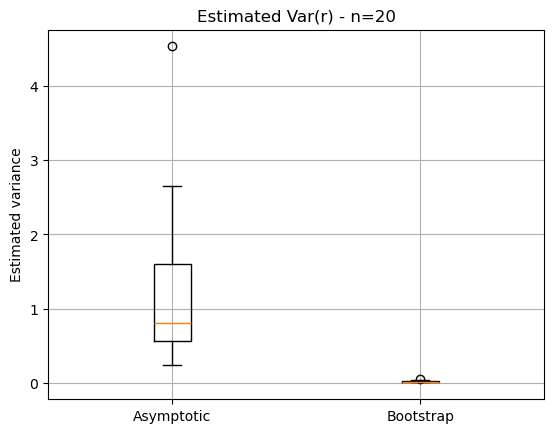

/tmp/ipykernel_61019/1608217984.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


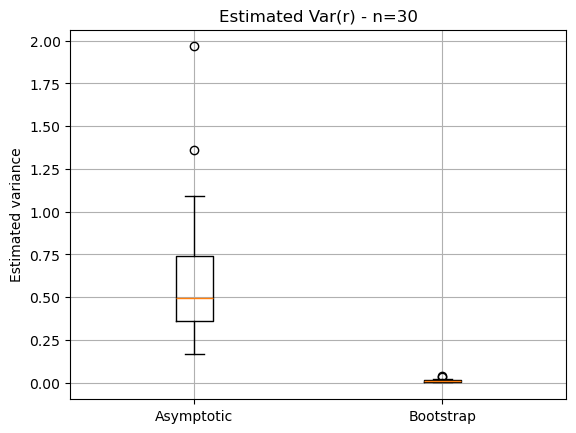

/tmp/ipykernel_61019/1608217984.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])


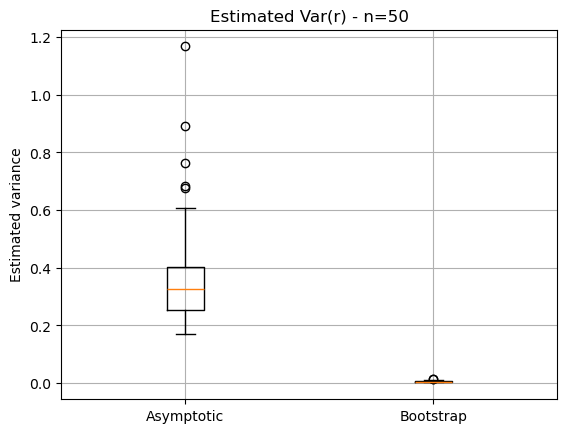

In [13]:
import matplotlib.pyplot as plt
for n in [20, 30, 50]:
    asymp, boot = simulate_var_compare(n=n)
    plt.figure()
    plt.boxplot([asymp, boot], labels=["Asymptotic", "Bootstrap"])
    plt.title(f"Estimated Var(r) - n={n}")
    plt.ylabel("Estimated variance")
    plt.grid(True)
    plt.show()


3.

(1)给出Bootstrap估计中位数失效的例子

(2)给出Bootstrap估计均值失效的例子

## Bootstrap 估计失效的两个例子

###  (1) Bootstrap 估计中位数失效的例子

Bootstrap 估计中位数通常表现良好，但在**分布本身中位数不稳定（不连续）或样本极端不对称**的情况下，可能会失效。

**示例：离散分布中位数跳跃（不连续）导致 Bootstrap 估计不一致**

设总体为一个离散分布：
$$
P(X = 0) = 0.49, \quad P(X = 1) = 0.02, \quad P(X = 100) = 0.49
$$

这个分布中位数非常不稳定：取样中只要多一个点，中位数就可能从 0 跳到 100，导致 Bootstrap 分布高度不连续，从而**不能准确估计中位数的分布或置信区间**。

###  (2) Bootstrap 估计均值失效的例子

Bootstrap 对均值估计通常非常稳健，但当**总体期望不存在**时，Bootstrap 将失效。

**示例：来自柯西分布（Cauchy）**

柯西分布没有期望（均值发散），因此 Bootstrap 对样本均值进行估计将非常不稳定，甚至无意义，生成的 Bootstrap 样本均值分布没有收敛性。

---


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置样式
sns.set(style="whitegrid")

# ========= (1) 中位数失效示例 =========
def discrete_distribution_median_bootstrap():
    # 构造离散总体
    values = [0, 1, 100]
    probs = [0.49, 0.02, 0.49]

    # 生成样本
    np.random.seed(0)
    sample = np.random.choice(values, size=20, p=probs)

    # 真实中位数
    print(f"Sample: {sample}")
    print(f"Sample median: {np.median(sample)}")

    # Bootstrap 中位数
    B = 1000
    medians = []
    for _ in range(B):
        resample = np.random.choice(sample, size=len(sample), replace=True)
        medians.append(np.median(resample))

    # 分布可视化
    plt.figure(figsize=(8, 4))
    sns.histplot(medians, kde=True, bins=30)
    plt.title("Bootstrap estimate of median (discrete, discontinuous case)")
    plt.xlabel("Bootstrap Sample Median")
    plt.show()


# ========= (2) 均值失效示例（柯西分布） =========
def cauchy_mean_bootstrap():
    # 生成柯西样本（均值不存在）
    np.random.seed(1)
    sample = np.random.standard_cauchy(size=30)

    # 样本均值
    print(f"Sample mean: {np.mean(sample):.3f}")

    # Bootstrap 均值
    B = 1000
    means = []
    for _ in range(B):
        resample = np.random.choice(sample, size=len(sample), replace=True)
        means.append(np.mean(resample))

    # 分布可视化
    plt.figure(figsize=(8, 4))
    sns.histplot(means, kde=True, bins=50)
    plt.title("Bootstrap estimate of mean (Cauchy distribution)")
    plt.xlabel("Bootstrap Sample Mean")
    plt.xlim(-100, 100)
    plt.show()


Sample: [100 100 100 100   0 100   0 100 100   0 100 100 100 100   0   0   0 100
 100 100]
Sample median: 100.0


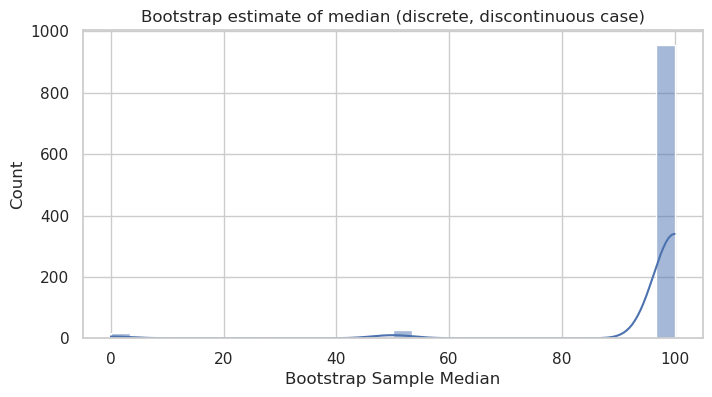

Sample mean: 1.623


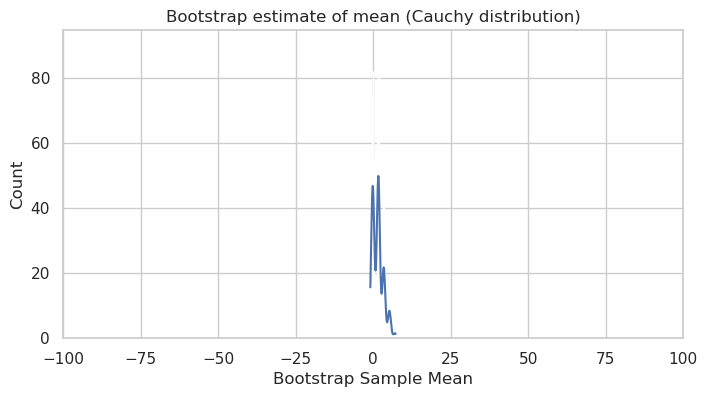

In [11]:
discrete_distribution_median_bootstrap()
cauchy_mean_bootstrap()
